# &#x1F4DD; Report Project 4

In [1]:
using Flux, MLDatasets, LinearAlgebra

In [2]:
using Flux: onehotbatch

In [3]:
using NPZ

In [4]:
# Load the dataset
dataset = npzread("data/bloodmnist.npz")

Dict{String, Array{UInt8}} with 6 entries:
  "train_labels" => [0x07; 0x03; … ; 0x06; 0x04;;]
  "test_labels"  => [0x03; 0x00; … ; 0x01; 0x07;;]
  "val_labels"   => [0x04; 0x00; … ; 0x01; 0x06;;]
  "test_images"  => [0xe8 0xe5 … 0xac 0xaf; 0xef 0xe3 … 0xb6 0xb8; … ; 0xe1 0xd…
  "val_images"   => [0xff 0xff … 0xc3 0xb9; 0xff 0xe7 … 0xfe 0xea; … ; 0xca 0xc…
  "train_images" => [0xfa 0xff … 0xd7 0xd9; 0xff 0xfd … 0xfe 0xfe; … ; 0xcd 0xc…

In [5]:
y_train_img = dataset["train_images"]; 
@show Float64.(y_train_img[1:4]), typeof(y_train_img), size(y_train_img);

(Float64.(y_train_img[1:4]), typeof(y_train_img), size(y_train_img)) = ([250.0, 255.0, 185.0, 226.0], Array{UInt8, 4}, (11959, 28, 28, 3))


In [6]:
# Add convenient operation functions
include("ops.jl");

In [7]:
index = 11950; img = Float32.(y_train_img[index, :, :, 2]);

In [8]:
using ImageView  # Packages for image handling and visualization

In [9]:
# Create a montage of the training dataset images (length=1 implies a single image)
# This part is highly dependent on the specific visualization functions available in Julia
L = 28
montage = hcat(y_train_img[1:L]...) # horizontally concatenates 28 images

# Visualize the montage
imshow(montage)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(accessible-role=GT…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{RUInt8}(0xb2, 0xff))

&#x1F4D1; Note: `imshow` function outputs an external image from Jupyter Notebook shown below
![figure](images/colorview_output.png)

In [10]:
using Images

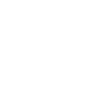

In [11]:
# view training input

index = 11950; img = Float32.(y_train_img[index, :, :, 2])

# use the ᵀ transpose symbol to invert the image

colorview(Gray, (img)ᵀ)


In [12]:
y_train_labl = dataset["train_labels"]; @show y_train_labl[1:4], typeof(y_train_labl), length(y_train_labl);

(y_train_labl[1:4], typeof(y_train_labl), length(y_train_labl)) = (UInt8[0x07, 0x03, 0x06, 0x06], Matrix{UInt8}, 11959)


In [13]:
using BenchmarkTools

In [14]:
nTrain = length(y_train_labl)

11959

In [15]:
@btime trainData = vcat([hcat(float.(y_train_img[i])...)  for i in 1:nTrain]...);

  1.886 ms (71256 allocations: 2.18 MiB)


In [16]:
trainData = vcat([hcat(float.(y_train_img[i])...)  for i in 1:nTrain]...);

In [17]:
@show typeof(trainData), length(trainData)

(typeof(trainData), length(trainData)) = (Matrix{Float64}, 11959)


(Matrix{Float64}, 11959)

In [18]:
trainLabels = y_train_labl[1:nTrain];

---

&#x1F39F; a] generating Dataset 1

In [19]:
# Total number of points
N = 2000

# Each row of X corresponds to a point
X = rand(N, 2)

# Label points
y = zeros(N)
for i = 1:N
    if X[i, 1] >= 0.3 && X[i, 1] <= 0.7 && X[i, 2] >= 0.3 && X[i, 2] <= 0.7
        y[i] = 1  # Point lies inside the rectangle
    else
        y[i] = -1
    end
end

using Random

# Divide the dataset into training set and test set
seq = randperm(N)  # This should now work without any issue
X_training = zeros(Int(N/2), 2)
X_test = zeros(Int(N/2), 2)
y_training = zeros(Int(N/2))
y_test = zeros(Int(N/2))
for i = 1:Int(N/2)
    X_training[i, :] = X[seq[i], :]
    y_training[i] = y[seq[i]]
    X_test[i, :] = X[seq[Int(N/2) + i], :]
    y_test[i] = y[seq[Int(N/2) + i]]
end

In [20]:
using Plots

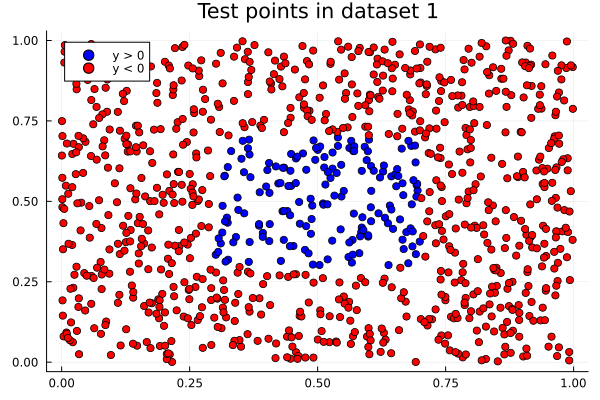

In [21]:
# Plotting the dataset
scatter(X_test[y_test .> 0, 1], X_test[y_test .> 0, 2], color = :blue, label = "y > 0")
scatter!(X_test[y_test .< 0, 1], X_test[y_test .< 0, 2], color = :red, label = "y < 0", title = "Test points in dataset 1")

In [22]:
# Load the functions 
include("choose_learner.jl")
include("strong_classifier.jl")
include("adaboost.jl")

adaboost (generic function with 1 method)

In [23]:
T = 40

println("****** Adaboost for Dataset 1 *****")

error_training, error_test, i_opt, p_opt, theta_opt, alpha = adaboost(X_training, X_test, T, y_training, y_test)

# Get final classification
H = strong_classifier(X_test, i_opt, p_opt, theta_opt, alpha);


****** Adaboost for Dataset 1 *****
Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.165

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.54

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.54

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.835

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.835

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.835

Training error of the strong classifier = 0.004
Error of the strong classifier on the test set = 0.835

Training error of the strong classifier = 0.161
Error of the strong classifier on the test set = 0.835

Training error of the strong classifier = 0.004
Error of the strong classifier on the test set = 0.835

Training error of the strong c

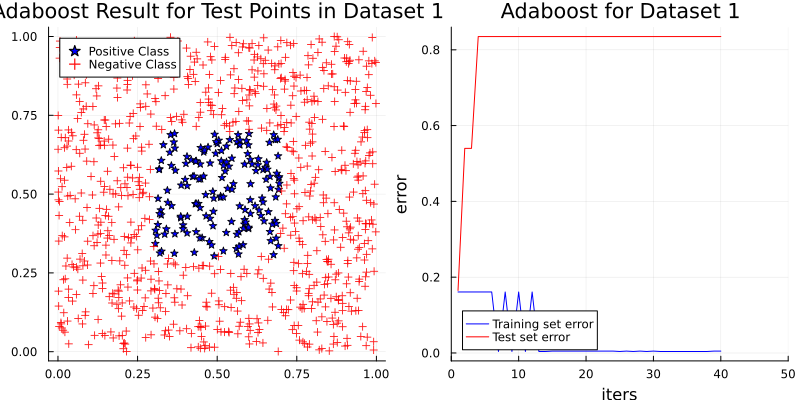

In [24]:
# Adaboost result for test points in dataset 1
pd11 = scatter(X_test[H .> 0, 1], X_test[H .> 0, 2], label="Positive Class"
    , color=:blue, marker=:star
    , title = "Adaboost Result for Test Points in Dataset 1"
)
scatter!(X_test[H .< 0, 1], X_test[H .< 0, 2], label="Negative Class", color=:red, marker=:+)

# Adaboost for Dataset 1
pd12 = plot(error_training
    , label="Training set error"
    , color=:blue
    , xlabel = "iters", ylabel = "error"
    , title = "Adaboost for Dataset 1"
    , xlims = (0,50)
    , legend = :topright
)
plot!(error_test, label="Test set error", color=:red)

plot(pd11, pd12
    , layout=(1, 2)
    , legend=:best
    , size = ( 800, 400 )
)


&#x1F39F; b] Generating Dataset 2

In [25]:
N = 2000
X = rand(N, 2)

# Label points
y = zeros(N)
for i in 1:N
    if (X[i,1] >= 0.3 && X[i,1] <= 0.7 && X[i,2] >= 0.3 && X[i,2] <= 0.7) ||
       (X[i,1] > 0.15 && X[i,1] < 0.25) || (X[i,1] > 0.75 && X[i,1] < 0.85) ||
       (X[i,2] > 0.15 && X[i,2] < 0.25) || (X[i,2] > 0.75 && X[i,2] < 0.85)
        y[i] = 1
    else
        y[i] = -1
    end
end

seq = randperm(N)
X_training = X[seq[1:Int(N/2)], :]
y_training = y[seq[1:Int(N/2)]]
X_test = X[seq[Int(N/2)+1:end], :]
y_test = y[seq[Int(N/2)+1:end]];

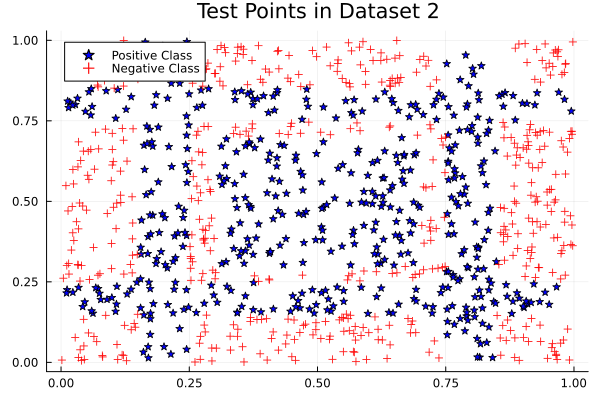

In [26]:
scatter(X_test[y_test .> 0, 1], X_test[y_test .> 0, 2], color=:blue, marker=:star, label="Positive Class")
scatter!(X_test[y_test .< 0, 1], X_test[y_test .< 0, 2], color=:red, marker=:+, label="Negative Class")
title!("Test Points in Dataset 2")

&#x1F39F; b] Adaboost for Dataset 2

In [27]:
T = 40

println("****** Adaboost for Dataset 2 *****")

# Assuming adaboost and strong_classifier functions are defined
error_training, error_test, i_opt, p_opt, theta_opt, alpha = adaboost(X_training, X_test, T, y_training, y_test)

# Get final classification
H = strong_classifier(X_test, i_opt, p_opt, theta_opt, alpha);

****** Adaboost for Dataset 2 *****
Training error of the strong classifier = 0.37
Error of the strong classifier on the test set = 0.415

Training error of the strong classifier = 0.37
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.376
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.285
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.309
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.259
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.259
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.274
Error of the strong classifier on the test set = 0.51

Training error of the strong classifier = 0.205
Error of the strong classifier on the test set = 0.51

Training error of the strong classifie

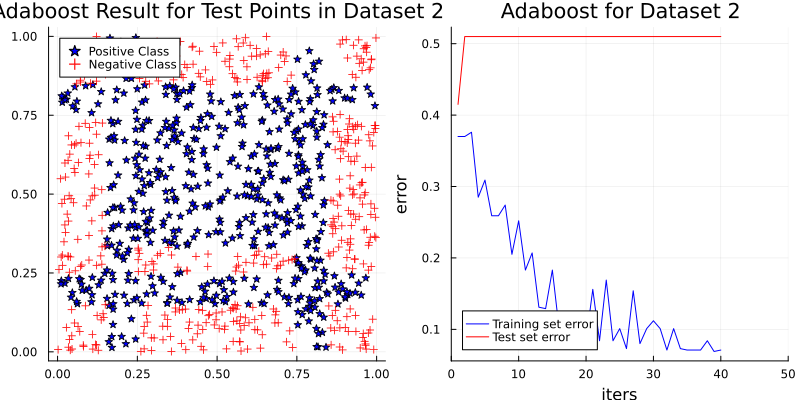

In [28]:
# Adaboost result for test points in dataset 2
pd21 = scatter(X_test[H .> 0, 1], X_test[H .> 0, 2], color=:blue, shape=:star, label="Positive Class")
scatter!(X_test[H .< 0, 1], X_test[H .< 0, 2], color=:red, shape=:+, label="Negative Class")
title!("Adaboost Result for Test Points in Dataset 2")

# Adaboost error plots for dataset 2
pd22 = plot(error_training
    , label="Training set error", color=:blue
    , xlabel = "iters", ylabel = "error"
    , title = "Adaboost for Dataset 2"
    , legend = :bottomright
    , xlims = (0,50)
)
plot!(error_test, label="Test set error", color=:red)

plot(pd21, pd22
    , layout=(1, 2)
    , legend=:best
    , size = ( 800, 400 )
)


&#x1F39F; c] Adaboost for Dataset 3

In [29]:
N = 2000
X = 2 * randn(N, 2)

dist = sqrt.(sum(X .^ 2, dims=2))

# Label points
y = fill(-1, N)
idx = findall(dist .< 2)
y[idx] .= 1

seq = randperm(N)
X_training = X[seq[1:Int(N/2)], :]
y_training = y[seq[1:Int(N/2)]]
X_test = X[seq[Int(N/2)+1:end], :]
y_test = y[seq[Int(N/2)+1:end]];


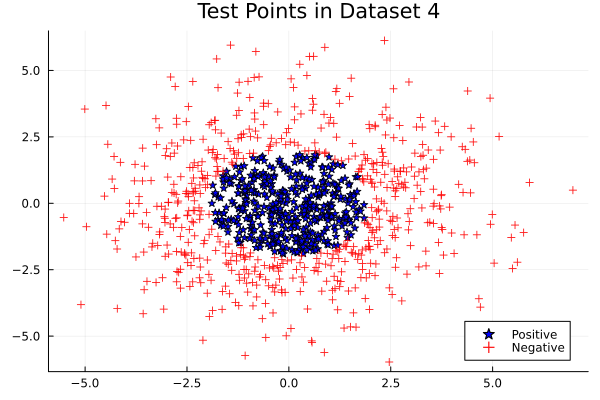

In [30]:
# Plotting the dataset for Dataset 4
scatter(X_test[y_test .> 0, 1], X_test[y_test .> 0, 2], color=:blue, shape=:star, label="Positive")
scatter!(X_test[y_test .< 0, 1], X_test[y_test .< 0, 2], color=:red, shape=:+, label="Negative")
title!("Test Points in Dataset 4")

&#x1F39F; d] Adaboost for Dataset 4

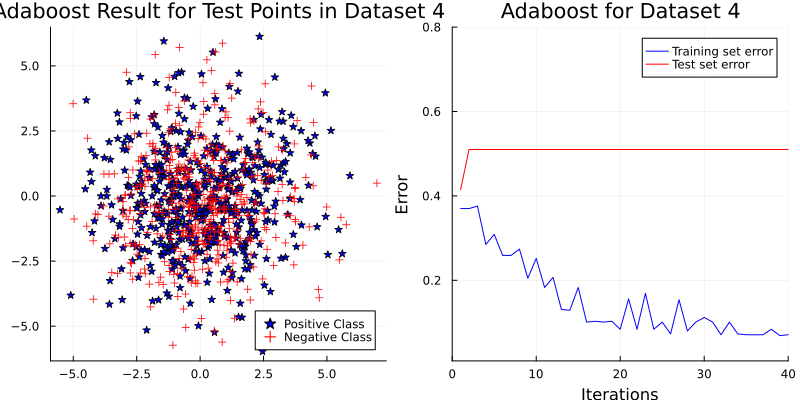

In [31]:
# Adaboost result for test points in dataset 4
pd41 = scatter(X_test[H .> 0, 1], X_test[H .> 0, 2], color=:blue, marker=:star, label="Positive Class")
scatter!(X_test[H .< 0, 1], X_test[H .< 0, 2], color=:red, marker=:+, label="Negative Class")
title!("Adaboost Result for Test Points in Dataset 4")

# Adaboost errors over iterations for dataset 4
pd42 = plot(error_training, label="Training set error", color=:blue
        , xlims = (0,40), ylims = (0.009,0.8)

)
plot!(error_test, label="Test set error", color=:red, legend=:topright)
xlabel!("Iterations")
ylabel!("Error")
title!("Adaboost for Dataset 4")

plot(pd41,pd42
    , size = (800,400)
)

# &#x1F4DA; References

- [ ] [MedMNIST v2 - A large-scale lightweight benchmark
for 2D and 3D biomedical image classification](https://arxiv.org/pdf/2110.14795.pdf)

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Source</th>
      <th>Data Modality</th>
      <th>Task (# Classes / Labels)</th>
      <th># Samples</th>
      <th># Training / Validation / Test</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>BloodMNIST</td>
      <td>Acevedo et al.</td>
      <td>Blood Cell Microscope</td>
      <td>MC (8)</td>
      <td>17,092</td>
      <td>11,959 / 1,712 / 3,421</td>
    </tr>
  </tbody>
</table>


- [ ] [\[05x08\] Intro to Artificial Neural Networks with Flux.jl (1 of 2); Julia Supervised Machine Learning](https://www.youtube.com/watch?v=zmlulaxatRs)
- [ ] [xanwerneck: Implementation of AdaBoost classifier](https://github.com/xanwerneck/adaboost)
- [ ] [AdaBoost, Clearly Explained](https://www.youtube.com/watch?v=LsK-xG1cLYA)
- [ ] [niranjantdesai: adaboost](https://github.com/niranjantdesai/adaboost)